# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13299999702721835


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# Bigger Buffer Stabilizes Training

from Agent import Agent
from OUNoise import OUNoise
import random

# Epsilon
eps_start, eps_decay = 1.0, 0.986       # Epsilon
limit = 20                              # Limit Number of Agents from Enviroment
# Agent & Noise
noise = None                                  # OUNoise
agent = Agent(limit, noise, random_seed=2)    # Agent that acts in Enviroment


BUFFER_SIZE 500000 
BATCH_SIZE 256 
GAMMA 0.99 
TAU 0.001 
LR_ACTOR 0.0001 
LR_CRITIC 0.001

ACTOR[i]:
 Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
)
CRITIC:
 Critic(
  (fcs1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=404, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)


In [8]:
import torch as T
from collections import deque

best = 5                                  # Best Score
saveScore = 5                             # To Save best model
eps = eps_start                           # Epsilon
lastScores = deque(maxlen=100)            # Running Average of Scores
allScores = []                            # Holds Running ScoreAvg for all episodes
finishCtr = 0
# Loop Episodes/ Trajectories
for e in range(1000):  
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.Action(states, eps=0, isRandom=eps>random.random()) # Get Agent Actions from each Agent
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = np.array(env_info.rewards)               # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        agent.Step(states, actions, rewards, next_states, dones, limit) # Save Agents Timesteps to Buffer
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones[:limit]):                          # exit loop if episode finished
            break
    agent._Train(limit)                                    # Train the Agent & Update the Model Weights
    scores = np.mean(scores)                               # Mean the Score across all Agents
    lastScores.append(scores)                              # Add Average score to arrays
    scr = np.average(lastScores)                           # Mean over 100 Episodes over the mean of all the Agents
    allScores.append(scr)
    if e>100: eps = max(eps*eps_decay, 0.01)               # Epsilon Decay
    # Best Score: Save Actor & Critic Models
    if scores>best:  
        best = scores
        T.save(agent.Actor[0].state_dict(), 'Actor.pt')
        T.save(agent.Critic.state_dict(), 'Critic.pt')
    # Display Metrics to User
    print("\rEpisode: {} Score: {:.2f} Current: {:.2f} ".format(e+1, scr, scores), end='')
    if (e+1) % 10 == 0: print("\rEpisode: {} Score: {:.2f} Current: {:.2f} ".format(e+1, scr, scores))
    # Finished if score is +30
    if scr>30:
        finishCtr += 1
        if finishCtr==20:
            print("\n=== FINISHED: Episode: {} Score: {:.2f} ".format(e+1, scr))
            break

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\Andrews X6i7\OneDrive\Udacity Deep RL\p2_continuous-control\Agent.py:103: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  T.nn.utils.clip_grad_norm(self.Critic.parameters(), 1)
C:\Users\Andrews X6i7\OneDrive\Udacity Deep RL\p2_continuous-control\Agent.py:110: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  T.nn.utils.clip_grad_norm(Actor.parameters(), 1)


Episode: 10 Score: 0.50 Current: 0.80 
Episode: 20 Score: 0.97 Current: 2.06 
Episode: 30 Score: 1.52 Current: 2.39 
Episode: 40 Score: 2.57 Current: 6.19 
Episode: 50 Score: 3.63 Current: 8.34 
Episode: 60 Score: 4.38 Current: 11.74 
Episode: 70 Score: 5.38 Current: 11.24 
Episode: 80 Score: 6.11 Current: 10.59 
Episode: 90 Score: 6.66 Current: 10.32 
Episode: 100 Score: 7.18 Current: 14.16 
Episode: 110 Score: 8.34 Current: 11.07 
Episode: 120 Score: 9.45 Current: 11.82 
Episode: 130 Score: 10.31 Current: 11.69 
Episode: 140 Score: 10.91 Current: 12.94 
Episode: 150 Score: 11.54 Current: 16.54 
Episode: 160 Score: 12.08 Current: 14.29 
Episode: 170 Score: 12.21 Current: 13.68 
Episode: 180 Score: 12.48 Current: 15.42 
Episode: 190 Score: 12.93 Current: 13.74 
Episode: 200 Score: 13.41 Current: 18.00 
Episode: 210 Score: 13.81 Current: 16.94 
Episode: 220 Score: 14.21 Current: 16.43 
Episode: 230 Score: 14.60 Current: 13.59 
Episode: 240 Score: 15.03 Current: 13.62 
Episode: 250 Score

Max Average Score: 30.98083430752438


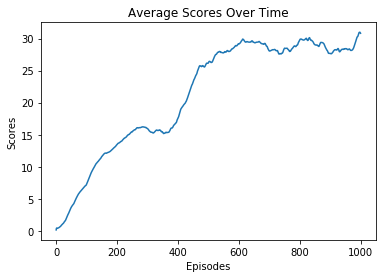

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
print('Max Average Score:', max(allScores))
# Plot Scores over Episodes
plt.plot(allScores)
plt.title('Average Scores Over Time')
plt.xlabel('Episodes')
plt.ylabel('Scores')
plt.show()

In [10]:
import torch as T
# Upload Agent
[actor.load_state_dict(T.load('Actor.pt')) for actor in agent.Actor]
agent.Critic.load_state_dict(T.load('Critic.pt'))
# Reset Env
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.Action(states)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.all(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode: 39.02899912763387


In [11]:
env.close()